<a id="Dimensionality Reduction"></a>

# Lab 09 - Dimensionality Reduction

***
In this lab session we will learn
   * Data Compression via PCA (Principle Component Analysis)
   * PCA and others using scikit-learn function
   * Imputer from sklearn preprocessing


__ Dimensionality reduction summarizes the information contents of a higher dimension dataset which is usually difficult to understand & visualize and transforming them into lower dimension space. This approach of dimensionality reduction is also referred to as feature extraction or Data Compression [1]. __

[1]. Sebastian Raschka. 2015. Python Machine Learning. Packt Publishing.

# Linear Reduction

## 1. PCA
* Unsupervised linear transformation
* Applications include dimensionality reduction, exploratory data analysis, de-noisinf signals etc
* Finds the direction of max variuance in high dimension data and projects into new subspace
* No of components can be equal to or less than the original 

In Tuesday's class, you had opportunity to look into applying PCA and LDA for iris and blob dataset respectively. Now, lets apply PCA & LDA for **cancer dataset** using function from scikit learn. Before dwelling into inbuilt functions, it would be worth to look 
* into the functioning of PCA by computing covraiance and eigen values
* procedure to select the no of components for higher dimension datasets

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


> ## 1.1 Principal Component Analysis - Internal working of PCA (without scikit-learn)

Mathematical approach for PCA was detailed in the class. Refer to week09 lecture notes. 

Steps to implement PCA is briefed below:
1. Standardize the dataset
2. construct the covariance matrix
3. get the eigen vectors and values by decomposing the covariance matrix
4. opt for 'n' eigen vectors that correspons to 'n' largest eigen values where n is the no of components that is needed to be reduced to.
5. Project mtrix from top 'n' eigen vectors
6. transform dataset using project matrix to new 'n' dimenional feature subspace

* __Standardize the dataset__

In [3]:
# standardize the dataset
x = StandardScaler().fit_transform(df)
X = pd.DataFrame(x, columns =wine.feature_names )
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


* __Covariance matrix__

In [4]:
import numpy as np
CovMatrix = np.cov(X.T)

* __Eigen Vectors and Values__

In [5]:
eigen_val, eigen_vec = np.linalg.eig(CovMatrix)

* __Opt for 'n' eigen vectors that correspons to 'n' largest eigen values__
* __Project matrix from top 'n' eigen vectors__
* __Transform dataset using project matrix to new 'n' dimenional feature subspace__

In [6]:
# constructing a projection matrix
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vec[:,i]) for i in range(len(eigen_val))]
# plt.bar(eigen_pairs)
eigen_pairs.sort(reverse = True)
# print (eigen_pairs
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
# print (w)

PCA_X = pd.DataFrame(X.dot(w))
PCA_X.columns = ['PC 1', 'PC 2']
species = pd.DataFrame(wine.target, columns =['class'])
PCA_X = pd.concat([PCA_X, species], axis = 1)

* __Visualizing the PC1 and PC2 gives us few insight__

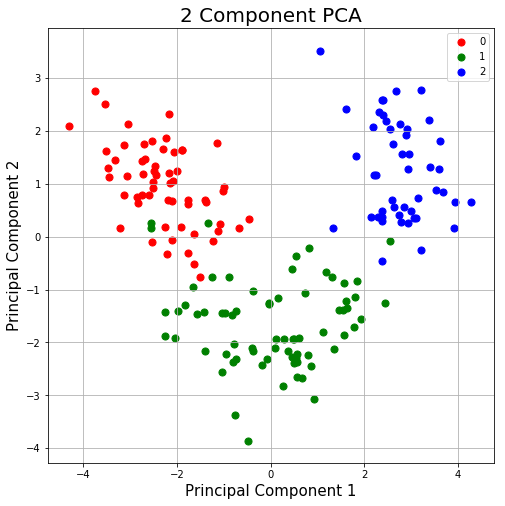

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [0 , 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = PCA_X['class'] == target
    ax.scatter(PCA_X.loc[indicesToKeep, 'PC 1'], PCA_X.loc[indicesToKeep, 'PC 2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

> ## 1.2 How many dimension should we keep ??

Choosing the right no of dimensions- 

* Cumulative percentage of variance - 70% to 95%
* Scree plot - plot of eigen values, look for elbow
* The Broken Stick 
* Size of variance - variance greater than 0.7

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]


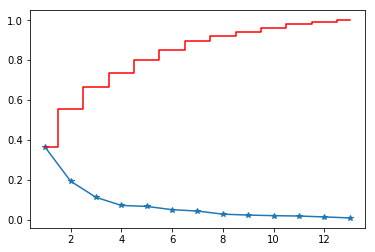

In [8]:
print (eigen_val)

tot = sum(eigen_val)
var_exp = [(i/tot) for i in sorted(eigen_val, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

plt.plot(range(1,14), var_exp,'-*')
plt.step(range(1,14), cum_var_exp, c='r', where='mid')

In [9]:
cum_var_exp

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

## Scikit-learn method for PCA

Now using scikit learn modules, implement the PCA.
* Use no of component to 2 to easy visualization
* Plot the PC1 and PC2 
* Use different colors for class of wine
* Do we need the target labels or y here?

## <font color='red'>1.3 Repeat section 1.1 but using PCA using Scikit-learn</font>

       PC 1      PC 2  class
0  3.316751 -1.443463      0
1  2.209465  0.333393      0
2  2.516740 -1.031151      0
3  3.757066 -2.756372      0
4  1.008908 -0.869831      0


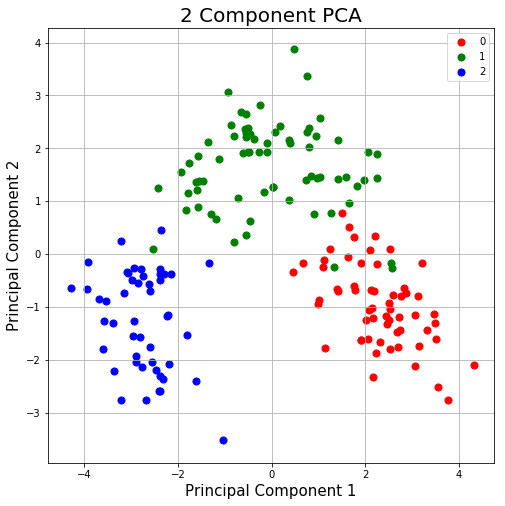

In [16]:
# import PCA here 
from sklearn.decomposition import PCA

# for simplification lets Opt for only 2 components
pca_sci = PCA(n_components=2)

# use fit_transform
PCs = pca_sci.fit_transform(X)


# pca has attribute that gives out the eigen values and its ratio. use dir(pca) to check the list of acceptable attribute
sum(pca_sci.explained_variance_ratio_)

# Transforming all the array and list data into pandas for easy control
PCs_df = pd.DataFrame(data = PCs, columns = ['PC 1', 'PC 2'])
species = pd.DataFrame(wine.target, columns =['class'])
PCs_df = pd.concat([PCs_df, species], axis = 1)
print (PCs_df.head())



# You can use the piece of code for ploting the scatter plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0 , 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = PCs_df['class'] == target
    ax.scatter(PCs_df.loc[indicesToKeep, 'PC 1'], PCs_df.loc[indicesToKeep, 'PC 2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

### <font color='red'> 1.3.1 What percentage of variance does PC1 and PC2 together give? will only 2 component reproduces the original dataset faithfully?</font>

In [17]:
print (pca_sci.explained_variance_ratio_)

[0.36198848 0.1920749 ]


**Together, the first two principal components contain only %55.4 of the information. The first principal component contains 36.2% of the variance and the second principal component contains 19.2% of the variance.**

### <font color='red'>1.3.2 Without using loop, can we iterate the no of component and obtain their variance?</font> 

In [18]:
pca1 = PCA(n_components=None)
PCs = pca1.fit_transform(X)
np.cumsum(pca1.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

### <font color='red'>1.3.3 Choosing the right dimension </font> 

* we know that we can set the dimension in the PCA using 'n_components= 2 or 3 or n-1' where n is the no of dimension. we can fixate on the dimension by gauging using the scree or looking into variance ratio
* there is another way to PCA; by chosing the desired variance. This is done by chosing the n_components< 1
* Find how many components needed to preserve a variance of atleast 60, 75 and 95 % 

In [24]:
# 60% 
pca2 = PCA(n_components=0.6)
X_reduced = pca2.fit_transform(X)
X_reduced.shape

(178, 3)

In [23]:
# 75% 
pca2 = PCA(n_components=0.75)
X_reduced = pca2.fit_transform(X)
X_reduced.shape

(178, 5)

In [21]:
# 95% 
pca2 = PCA(n_components=0.95)
X_reduced = pca2.fit_transform(X)
X_reduced.shape

(178, 10)

## 2. LDA

LDA features
* Linear transformation technique
* Also known as **Fisher's LDA**
* used for feature extraction 
* increases computation efficiency
* reduces overfitting
* In contrast to PCA methodology i.e., finding orthogonal component axes with maximum variance , LDA works on finding feature subspace that optimise class separability
* Supervised


For internal working of LDA refer to section - Supervised data compression via Linear Discriminant Analysis (LDA), from textbook by Sebastian Raschka, 2015, "Python Machine Learning", Packt Publishing.

Also see: 

http://scikit-learn.org/stable/modules/lda_qda.html

http://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html

Note: 

Some version may not import using this line of code: "from sklearn.lda import LDA", instead import from sklearn.discriminant_analysis


## <font color='red'> 2.1 Using links from the above, implement the LDA from scikit-learn module </font> 

* Perform using Singular Value Decomposition (**SVD**)
* For simplicity chose two components
* Implement first for wine dataset

In [25]:
y = pd.DataFrame(wine.target, columns =['class'])
# y.head()

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# from sklearn.lda import LDA
lda = LDA(solver ='svd', n_components = 2)
X_lda = lda.fit_transform(X,y)

C:\Users\hvempral\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        LD1       LD2  class
0 -4.700244  1.979138      0
1 -4.301958  1.170413      0
2 -3.420720  1.429101      0
3 -4.205754  4.002871      0
4 -1.509982  0.451224      0


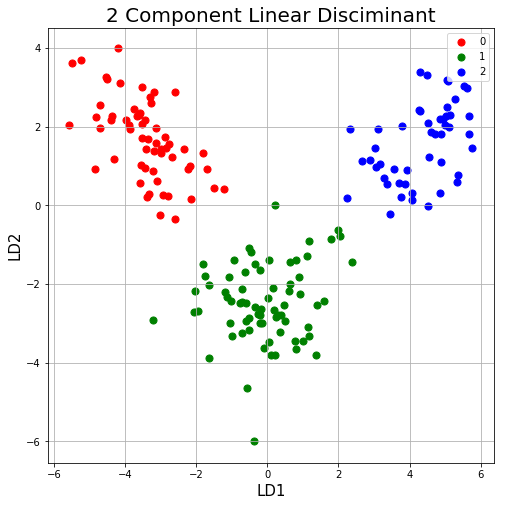

In [27]:
LDA_df = pd.DataFrame(data = X_lda, columns = ['LD1', 'LD2'])
species = pd.DataFrame(wine.target, columns =['class'])
LDA_df = pd.concat([LDA_df, species], axis = 1)
print (LDA_df.head())

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LD1', fontsize = 15)
ax.set_ylabel('LD2', fontsize = 15)
ax.set_title('2 Component Linear Disciminant', fontsize = 20)

targets = [0 , 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = LDA_df['class'] == target
    ax.scatter(LDA_df.loc[indicesToKeep, 'LD1'], LDA_df.loc[indicesToKeep, 'LD2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

## <font color='red'>2.2 Compare between PCA and LDA. Which method results in more fidelity response to Dataset with only two components?</font>


In [28]:
lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

** LDA seems to produce good result with two components contributing to almost 99%.** 

# 3. Nonlinear Methods for Dimensionality reduction

In the class you had learnt about the dimensionality reduction for nonlinear dataset. 

Refer to section 3.1 on Multidimensional scaling (**MDS**), section 3.2 for Manifold Learnings , particularly the Locally Linear Embedding (**LLE**), Isometric Feature Mapping (**ISOMAP**) and Hessian EigenMaps.

We will now implement those nonlinear dimensionality reduction concept on a Nonlinear dataset. S-curve manifold.


http://scikit-learn.org/stable/modules/manifold.html#manifold


An example of application of manifold learning on digits dataset is in the link : http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py


### Implement Nonlinear methods studied in class to S-curve dataset

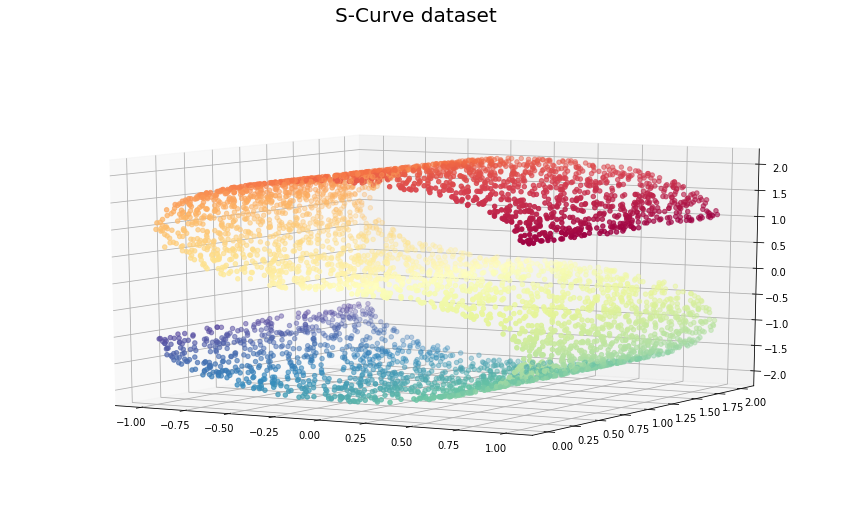

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

Axes3D

n_points = 5000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=10)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("S-Curve dataset", fontsize=20)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -60)

### We now have the S-curve dataset, apply the linear transformation methods like PCA and observe the significance of Nonlinear & geometric methods.

### <font color='Red'>Do the following: </font>
* ### <font color='Red'> Apply PCA for desired variance of 90% </font>
* ### <font color='Red'> Apply PCA for n_component = 2 </font>
* ### <font color='Red'> Apply LLE </font>
* ### <font color='Red'> Apply ISOMAP </font>
* ### <font color='Red'> Apply Hessian EigenMaps </font>

## PCA

(5000, 3)


C:\Users\hvempral\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


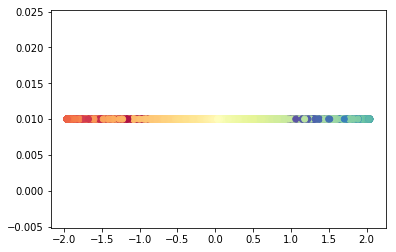

In [37]:
# import PCA here 
from sklearn.decomposition import PCA
pca_S = PCA(n_components = 0.9)
Y = pca_S.fit_transform(X)


print (Y.shape)
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], np.zeros((n_points,1))+0.01, c=color, cmap=plt.cm.Spectral)

C:\Users\hvempral\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


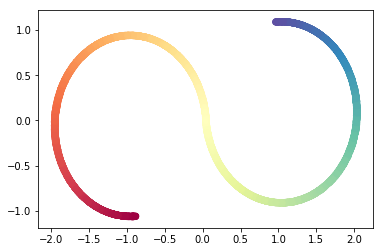

In [38]:
pca = PCA(n_components = 2)

Y = pca.fit_transform(X)
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)

### Important Note: 
### PCA is an unsupervised method and doesnot use class label to maximize the variance, which is not the case with LDA method.

## LLE

C:\Users\hvempral\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.03797277208554508,
 0.03767425856591566,
 -0.054416291264251695,
 0.06387454620575833)

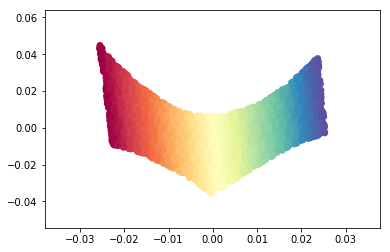

In [39]:
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=10)

Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver='auto', method='standard').fit_transform(X)
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
# plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

## ISOMAP

C:\Users\hvempral\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-5.237934701503115, 5.463067270768607, -1.3019122756072026, 1.237601768029159)

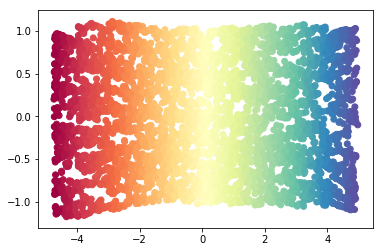

In [40]:
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis()

## Hessian EigenMaps

C:\Users\hvempral\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.03625733460408439,
 0.03726024532449312,
 -0.04218280373711856,
 0.04289223719433386)

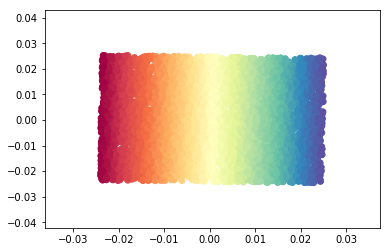

In [41]:
Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver='auto', method='hessian').fit_transform(X)
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
# plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

### Moons dataset

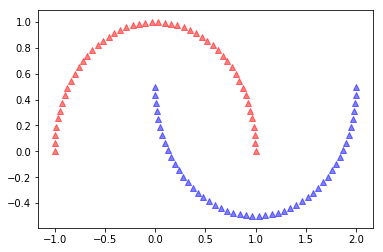

In [42]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker = '^', alpha = 0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker = '^', alpha = 0.5)

### KernelPCA

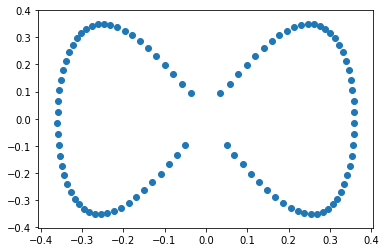

In [45]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="rbf", gamma=16, n_components = 2)
X_kpca = kpca.fit_transform(X)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1]) #, c=color, cmap=plt.cm.Spectral)

## Misc: Imputer
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute

__Simple excercise on data preprocessing__

from sklearn.preprocessing import Imputer 

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)

imr = imr.fit(df)

Imputed_data = imr.transform(df.values)

imputed_data